In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [97]:
ld_scores_ord = ["LDSC", "L2", "LD2MAF", "LD2"]
trait_subset = [
        "Age at Menarche", "Age at Menopause", "Height", 
        "BMI", "Waist-hip Ratio", "Systolic Blood Pressure",
        "High Cholesterol", "Type 2 diabetes", "Respiratory and Ear-nose-throat Diseases",
        "Auto Immune Traits (Sure)", "Eczema", "Hypothyroidism"
    ]

ld_scores_colors = {
    'LDSC': '#F28E2B',
    'LD2': '#E15759',
    'LD2MAF': '#76B7B2',
    'L2': '#B07AA1'
}

metric_tex = {
    'hg2': '$h_g^2$',
    'Intercept': 'Intercept',
    'Ratio': 'Ratio'
}

In [103]:
metric_df = pd.read_csv("../tables/table_1/M/global_metrics.csv")
metric_df = metric_df.loc[~metric_df['Method'].isin(['L2', 'S-L2'])]
metric_df.head()

,Method,Metric,Score,Score SE,Trait
0,LDSC,hg2,0.125718,0.007208,Waist-hip Ratio
1,S-LDSC,hg2,0.170511,0.007208,Waist-hip Ratio
4,LD2MAF,hg2,0.135975,0.006910,Waist-hip Ratio
5,S-LD2MAF,hg2,0.167315,0.006910,Waist-hip Ratio
6,LD2,hg2,0.145946,0.006748,Waist-hip Ratio


In [95]:
metric_df['Metric'].unique()

array(['hg2', 'Intercept', 'Ratio'], dtype=object)

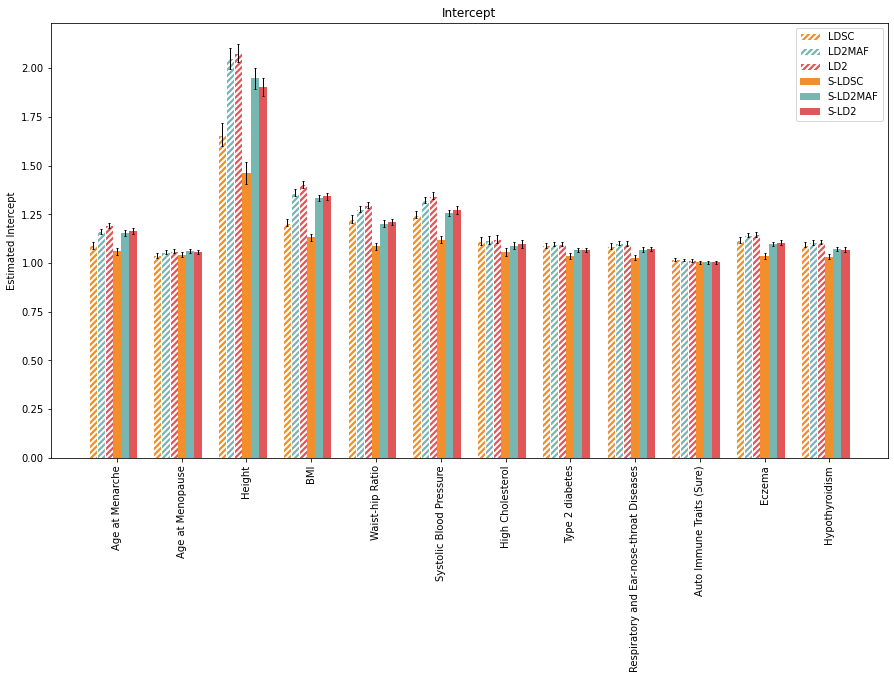

In [104]:
def plot_global_metric(metric_df, metric, relative_to=None):
    
    
    metric_df = metric_df.loc[metric_df['Metric'] == metric]
    
    mean_pivot = metric_df.pivot(index='Trait', columns='Method',
                                 values='Score')
    se_pivot = metric_df.pivot(index='Trait', columns='Method',
                               values='Score SE')
    
    if relative_to is not None:
        
        se_pivot = 100.0*se_pivot.div(mean_pivot[relative_to], axis=0)
        mean_pivot = 100.0*(mean_pivot.div(mean_pivot[relative_to], axis=0) - 1.0)
        
        mean_pivot.drop(relative_to, axis=1, inplace=True)
        se_pivot.drop(relative_to, axis=1, inplace=True)
        
    
    methods = [lds for lds in ld_scores_ord
               if lds in mean_pivot.columns]
    methods += ['S-' + lds for lds in ld_scores_ord
               if 'S-' + lds in mean_pivot.columns]
    
    mean_dict = {
        k: [v[t] for t in trait_subset]
        for k, v in mean_pivot.to_dict().items()
    }
    se_dict = {
        k: [v[t] for t in trait_subset]
        for k, v in se_pivot.to_dict().items()
    }
    
    fig, ax = plt.subplots(figsize=(15, 8))
    
    width = 1.0
    x = np.arange(len(mean_dict['LDSC']))*2*width*(1 + len(methods) // 2)
    
    for idx, m in enumerate(methods):
        rect = ax.bar(x - (len(methods)//2 - idx)*width,
                      mean_dict[m],
                      width, yerr=se_dict[m],
                      label=m,
                      color=ld_scores_colors[m.replace('S-', '')],
                      error_kw=dict(lw=1, capsize=width, capthick=1))
        if m[:2] != 'S-':
            for bar in rect:
                bar.set_hatch('////')
                bar.set_edgecolor('white')
        
    ax.set_xticks(x)
    ax.set_xticklabels(trait_subset)
    
    for label in ax.get_xmajorticklabels():
        label.set_rotation(90)
    
    if relative_to is None:
        plt.ylabel(f"Estimated {metric_tex[metric]}")
    else:
        plt.ylabel(f"{metric_tex[metric]} (% difference w.r.t. {relative_to})")
    
    plt.title(f"{metric_tex[metric]}")
    plt.legend()
    
    
plot_global_metric(metric_df, 'Intercept')

In [79]:
s_metric_df = metric_df.loc[metric_df['Metric'] == 'hg2']
piv = s_metric_df.pivot(index='Trait', columns='Method', values='Score')
piv

Method,LD2,LD2MAF,LDSC,S-LD2,S-LD2MAF,S-LDSC
Trait,,,,,,
Age at Menarche,0.234340,0.221894,0.214724,0.240060,0.248356,0.252985
Age at Menopause,0.102260,0.097412,0.092621,0.109319,0.107113,0.109313
Auto Immune Traits (Sure),0.005745,0.004943,0.004248,0.010026,0.010448,0.009776
BMI,0.261647,0.244400,0.236561,0.265439,0.272409,0.277874
Eczema,0.064925,0.061161,0.057496,0.078387,0.081483,0.084652
Height,0.669641,0.570450,0.569248,0.684020,0.659482,0.674005
High Cholesterol,0.038195,0.035506,0.032455,0.047374,0.050572,0.050661
Hypothyroidism,0.042533,0.039396,0.036297,0.052882,0.053070,0.054570
Respiratory and Ear-nose-throat Diseases,0.044419,0.040514,0.038255,0.054880,0.056957,0.059306


In [84]:
100.0*(piv.div(piv['S-LDSC'],axis=0) - 1.0)

Method,LD2,LD2MAF,LDSC,S-LD2,S-LD2MAF,S-LDSC
Trait,,,,,,
Age at Menarche,-7.369776,-12.289359,-15.123636,-5.108785,-1.829781,0.0
Age at Menopause,-6.451530,-10.886283,-15.269556,0.005933,-2.012422,0.0
Auto Immune Traits (Sure),-41.231520,-49.433223,-56.549037,2.561533,6.880849,0.0
BMI,-5.839827,-12.046306,-14.867636,-4.475218,-1.966567,0.0
Eczema,-23.303404,-27.750313,-32.079714,-7.401289,-3.743554,0.0
Height,-0.647506,-15.364118,-15.542396,1.485892,-2.154692,0.0
High Cholesterol,-24.606876,-29.913045,-35.936903,-6.488317,-0.174417,0.0
Hypothyroidism,-22.057873,-27.806973,-33.484648,-3.093051,-2.748339,0.0
Respiratory and Ear-nose-throat Diseases,-25.101511,-31.687616,-35.495425,-7.462868,-3.961097,0.0


In [87]:
se_piv = s_metric_df.pivot(index='Trait', columns='Method', values='Score SE')
100.0*(se_piv.div(piv['S-LDSC'],axis=0))

Method,LD2,LD2MAF,LDSC,S-LD2,S-LD2MAF,S-LDSC
Trait,,,,,,
Age at Menarche,3.674976,3.568902,4.071681,3.674976,3.568902,4.071681
Age at Menopause,7.849152,8.353980,9.012143,7.849152,8.353980,9.012143
Auto Immune Traits (Sure),15.060947,16.940458,17.287474,15.060947,16.940458,17.287474
BMI,2.357358,2.445312,2.408083,2.357358,2.445312,2.408083
Eczema,5.975461,5.913190,6.853819,5.975461,5.913190,6.853819
Height,4.116171,3.925277,3.874863,4.116171,3.925277,3.874863
High Cholesterol,6.521766,7.983870,7.650153,6.521766,7.983870,7.650153
Hypothyroidism,6.655482,6.278331,6.567773,6.655482,6.278331,6.567773
Respiratory and Ear-nose-throat Diseases,6.263929,6.446900,7.018307,6.263929,6.446900,7.018307


In [127]:
annot_df = pd.read_csv("../tables/table_1/UKBB_data/M_5_50_chi2filt/annotation_metrics.csv")
annot_df

,Annotation,Method,Metric,Score,Score SE,Trait
0,base,LDSC,tau,-1.384078e-08,1.062908e-08,Waist-hip Ratio
1,Coding_UCSC,LDSC,tau,-1.053403e-07,7.104801e-08,Waist-hip Ratio
2,Coding_UCSC.flanking.500,LDSC,tau,-4.029699e-08,2.095052e-08,Waist-hip Ratio
3,Conserved_LindbladToh,LDSC,tau,1.850435e-07,1.004346e-07,Waist-hip Ratio
4,Conserved_LindbladToh.flanking.500,LDSC,tau,-7.168398e-09,1.150134e-08,Waist-hip Ratio
...,...,...,...,...,...,...
9307,Ancient_Sequence_Age_Human_Enhancer,LD2,tau_star,1.333983e+00,2.711449e+00,Auto Immune Traits (Sure)
9308,Ancient_Sequence_Age_Human_Enhancer.flanking.500,LD2,tau_star,4.666416e+00,2.640031e+00,Auto Immune Traits (Sure)
9309,Human_Enhancer_Villar_Species_Enhancer_Count,LD2,tau_star,-8.431309e-02,1.320818e+00,Auto Immune Traits (Sure)
9310,Human_Promoter_Villar_ExAC,LD2,tau_star,3.288557e-01,1.830911e+00,Auto Immune Traits (Sure)


In [167]:

metric = 'tau_star'
annot_subset = ['MAF_Adj_Predicted_Allele_Age', 'MAF_Adj_LLD_AFR',
       'Recomb_Rate_10kb', 'Nucleotide_Diversity_10kb',
       'Backgrd_Selection_Stat', 'CpG_Content_50kb', 'MAF_Adj_ASMC']
ma_type = 'random'

meta_results = []
meta_results_se = []

for method in annot_df['Method'].unique():

    m_annot_df = annot_df.loc[(annot_df['Method'] == method) & 
                              (annot_df['Metric'] == metric) & 
                              (annot_df['Annotation'].isin(annot_subset))]

    piv_annot = m_annot_df.pivot(index='Annotation', columns='Trait', values='Score')
    piv_annot_se = m_annot_df.pivot(index='Annotation', columns='Trait', values='Score SE')

    meta_res = {'Method': method}
    meta_res_se = {'Method': method}
    
    for annot in list(piv_annot.index):
        
        res = dict(meta.metagen(ro.FloatVector(piv_annot.loc[annot].values),
                                ro.FloatVector(piv_annot_se.loc[annot].values)).items())
        
        if ma_type == 'fixed':
            meta_res[annot] = list(res['TE.fixed'].items())[0][1]
            meta_res_se[annot] = list(res['seTE.fixed'].items())[0][1]
        elif ma_type == 'random':
            meta_res[annot] = list(res['TE.random'].items())[0][1]
            meta_res_se[annot] = list(res['seTE.random'].items())[0][1]
        
    
    meta_results.append(meta_res)
    meta_results_se.append(meta_res_se)

pd.DataFrame(meta_results).set_index('Method').T
pd.DataFrame(meta_results_se).set_index('Method').T

Method,LDSC,L2,LD2MAF,LD2
Backgrd_Selection_Stat,0.019538,0.019613,0.019150,0.096350
CpG_Content_50kb,0.046955,0.046858,0.048146,0.157059
MAF_Adj_ASMC,0.026368,0.026369,0.024116,0.092594
MAF_Adj_LLD_AFR,0.019401,0.019381,0.019809,0.071194
MAF_Adj_Predicted_Allele_Age,0.034668,0.034727,0.038998,0.119493
Nucleotide_Diversity_10kb,0.020963,0.020932,0.021106,0.085823
Recomb_Rate_10kb,0.019383,0.019352,0.019361,0.066396


In [157]:
{'Backgrd_Selection_Stat': 0.071771277583601, 'CpG_Content_50kb': 0.1471742350047609, 'MAF_Adj_ASMC': -0.22128483530494172, 'MAF_Adj_LLD_AFR': -0.1701594572691381, 'MAF_Adj_Predicted_Allele_Age': -0.09376181521815677, 'Nucleotide_Diversity_10kb': -0.031203527581468174, 'Recomb_Rate_10kb': -0.16600250827409252}

{'Backgrd_Selection_Stat': 0.071771277583601,
 'CpG_Content_50kb': 0.1471742350047609,
 'MAF_Adj_ASMC': -0.22128483530494172,
 'MAF_Adj_LLD_AFR': -0.1701594572691381,
 'MAF_Adj_Predicted_Allele_Age': -0.09376181521815677,
 'Nucleotide_Diversity_10kb': -0.031203527581468174,
 'Recomb_Rate_10kb': -0.16600250827409252}

In [140]:
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
meta = importr('meta')

In [151]:
res = dict(meta.metagen(ro.FloatVector([1.2, 3.4, 5.6]), ro.FloatVector([0.1, 0.09, 0.25])).items())

In [155]:
list(res['TE.random'].items())[0][1], list(res['TE.fixed'].items())[0][1]

(3.3878938696170184, 2.62825324809239)

In [166]:
res

{'studlab': R object with classes: ('RTYPES.INTSXP',) mapped to:
 [1, 2, 3, 4, ..., 9, 10, 11, 12],
 'TE': R object with classes: ('numeric',) mapped to:
 [-0.791920, -0.451873, -0.009486, -0.665859, ..., -0.717099, -0.536848, -0.047118, -0.550455],
 'seTE': R object with classes: ('numeric',) mapped to:
 [0.184422, 0.407071, 0.799283, 0.139534, ..., 0.294376, 0.168101, 0.371319, 0.198370],
 'lower': R object with classes: ('numeric',) mapped to:
 [-1.153381, -1.249717, -1.576053, -0.939340, ..., -1.294065, -0.866320, -0.774890, -0.939254],
 'upper': R object with classes: ('numeric',) mapped to:
 [-0.430458, 0.345972, 1.557080, -0.392378, ..., -0.140132, -0.207376, 0.680653, -0.161657],
 'zval': R object with classes: ('numeric',) mapped to:
 [-4.294052, -1.110059, -0.011869, -4.772034, ..., -2.435994, -3.193604, -0.126895, -2.774889],
 'pval': R object with classes: ('numeric',) mapped to:
 [0.000018, 0.266974, 0.990530, 0.000002, ..., 0.014851, 0.001405, 0.899024, 0.005522],
 'w.fix

In [172]:
annot_df['Annotation'].unique()

array(['base', 'Coding_UCSC', 'Coding_UCSC.flanking.500',
       'Conserved_LindbladToh', 'Conserved_LindbladToh.flanking.500',
       'CTCF_Hoffman', 'CTCF_Hoffman.flanking.500', 'DGF_ENCODE',
       'DGF_ENCODE.flanking.500', 'DHS_peaks_Trynka', 'DHS_Trynka',
       'DHS_Trynka.flanking.500', 'Enhancer_Andersson',
       'Enhancer_Andersson.flanking.500', 'Enhancer_Hoffman',
       'Enhancer_Hoffman.flanking.500', 'FetalDHS_Trynka',
       'FetalDHS_Trynka.flanking.500', 'H3K27ac_Hnisz',
       'H3K27ac_Hnisz.flanking.500', 'H3K27ac_PGC2',
       'H3K27ac_PGC2.flanking.500', 'H3K4me1_peaks_Trynka',
       'H3K4me1_Trynka', 'H3K4me1_Trynka.flanking.500',
       'H3K4me3_peaks_Trynka', 'H3K4me3_Trynka',
       'H3K4me3_Trynka.flanking.500', 'H3K9ac_peaks_Trynka',
       'H3K9ac_Trynka', 'H3K9ac_Trynka.flanking.500', 'Intron_UCSC',
       'Intron_UCSC.flanking.500', 'PromoterFlanking_Hoffman',
       'PromoterFlanking_Hoffman.flanking.500', 'Promoter_UCSC',
       'Promoter_UCSC.flankin

In [173]:
"_".join(['k'])

'k'

In [204]:
def calculate_longest_orf_alan(s):
    
    ugc = {"TTT":"F", "TTC":"F", "TTA":"L", "TTG":"L","TCT":"S", 
       "TCC":"S", "TCA":"S", "TCG":"S","TAT":"Y", "TAC":"Y", 
       "TAA":"*", "TAG":"*","TGT":"C", "TGC":"C", "TGA":"*", 
       "TGG":"W","CTT":"L", "CTC":"L", "CTA":"L", "CTG":"L",
       "CCT":"P", "CCC":"P", "CCA":"P", "CCG":"P","CAT":"H", 
       "CAC":"H", "CAA":"Q", "CAG":"Q","CGT":"R", "CGC":"R", 
       "CGA":"R", "CGG":"R","ATT":"I", "ATC":"I", "ATA":"I", 
       "ATG":"M","ACT":"T", "ACC":"T", "ACA":"T", "ACG":"T",
       "AAT":"N", "AAC":"N", "AAA":"K", "AAG":"K","AGT":"S", 
       "AGC":"S", "AGA":"R", "AGG":"R","GTT":"V", "GTC":"V", 
       "GTA":"V", "GTG":"V","GCT":"A", "GCC":"A", "GCA":"A", 
       "GCG":"A","GAT":"D", "GAC":"D", "GAA":"E", "GAG":"E",
       "GGT":"G", "GGC":"G", "GGA":"G", "GGG":"G", "---":"-"}

    def revcom(seq):
        com = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A','N': 'N', '-': '-'}
        return ''.join(reversed([com[b] for b in list(seq)]))
   
    maxpep=""
    for seq in [s, revcom(s)]:   
        bases=list(seq)
        for frame in [0,1,2]:
            thisp=[]
            cDNA=""
            for i in range(frame,len(bases)-3,3):
                trip = ''.join(bases[i:i+3])
               
                aa = codons[trip]
                if (aa == '*'):
                    cDNA += trip
                    #if (len(thisp)>10): print (i-len(cDNA),i,cDNA)
                    if (len(thisp)>len(maxpep)): maxpep = "".join(thisp)
                    thisp=[]
                    cDNA=""
                elif (len(thisp) > 0):
                    thisp.append(aa)   
                    cDNA += trip
                elif (aa == 'M'):
                    thisp.append(aa)
                    cDNA += trip
            if (len(thisp)>len(maxpep)): maxpep = "".join(thisp) ## in case no stop codon
    
    return len(maxpep)  

In [205]:
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna

def calculate_longest_orf(seq):
    """
    Parts of this function are borrowed from here:
    http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc302
    """

    seq = Seq(str(seq).replace("-", ""), generic_dna)
    max_len = 0

    for strand, nuc in [(1, seq), (-1, seq.reverse_complement())]:
        for frame in range(3):
            length = 3 * ((len(seq)-frame) // 3)
            max_len = max(max_len, max([len(pro) for pro in
                                        nuc[frame:frame+length].translate().split("*")]))

    return float(max_len)

In [206]:
seq_len = 120
seq = "".join(np.random.choice(['A', 'C', 'G', 'T'], size=seq_len))

len(find_longest_orf(ugc, seq)), calculate_longest_orf(seq)

(33, 40.0)

In [191]:
Seq(seq).translate()

Seq('PRGGATLRPSSGIFKLWSHLTST*NCGRVV*TDGIKTYKS', HasStopCodon(ExtendedIUPACProtein(), '*'))

In [225]:
df = pd.read_csv("/Users/szabad/amaranth/PycharmProjects/modified_ldsr/tables/table_1/UKBB_data/M_5_50_chi2filt/global_metrics.csv")
metric = 'Intercept'
relative_to = 'S-LDSC'

metric_df = df.loc[df['Metric'] == metric]

mean_pivot = metric_df.pivot(index='Trait', columns='Method',
                             values='Score')
se_pivot = metric_df.pivot(index='Trait', columns='Method',
                           values='Score SE')

se_pivot = 100.0 * se_pivot.div(mean_pivot[relative_to], axis=0)
mean_pivot = 100.0 * (mean_pivot.div(mean_pivot[relative_to], axis=0) - 1.0)

mean_pivot.drop(relative_to, axis=1, inplace=True)
mean_pivot.describe()

Method,LD2,LD2MAF,LDSC,S-LD2,S-LD2MAF
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.409734,13.376783,7.665465,10.728270,9.640481
std,9.912975,9.103937,4.949802,7.112490,7.176901
min,1.090518,1.184162,-0.172730,0.108229,0.095446
25%,7.257599,7.081858,3.413911,5.598380,4.601093
50%,13.327594,9.991680,6.195654,10.634694,7.983790
75%,21.892793,19.728712,11.645960,13.664456,13.942507
max,42.164718,40.178491,17.572433,30.231677,33.151020


In [222]:
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
r_meta = importr('meta')

def meta_analyze_annot(annot_df, metric='tau_star', ma_type='random'):
    meta_results = []
    meta_results_se = []

    for method in annot_df['Method'].unique():

        m_annot_df = annot_df.loc[(annot_df['Method'] == method) &
                                  (annot_df['Metric'] == metric) &
                                  (annot_df['Annotation'].isin(annot_subset))]

        piv_annot = m_annot_df.pivot(index='Annotation', columns='Trait', values='Score')
        piv_annot_se = m_annot_df.pivot(index='Annotation', columns='Trait', values='Score SE')

        meta_res = {'Method': method}
        meta_res_se = {'Method': method}

        for annot in list(piv_annot.index):

            res = dict(r_meta.metagen(ro.FloatVector(piv_annot.loc[annot].values),
                                      ro.FloatVector(piv_annot_se.loc[annot].values)).items())

            if ma_type == 'fixed':
                meta_res[annot] = list(res['TE.fixed'].items())[0][1]
                meta_res_se[annot] = list(res['seTE.fixed'].items())[0][1]
            elif ma_type == 'random':
                meta_res[annot] = list(res['TE.random'].items())[0][1]
                meta_res_se[annot] = list(res['seTE.random'].items())[0][1]

        meta_results.append(meta_res)
        meta_results_se.append(meta_res_se)

    return (pd.DataFrame(meta_results).set_index('Method').T,
            pd.DataFrame(meta_results_se).set_index('Method').T)

df = pd.read_csv("/Users/szabad/amaranth/PycharmProjects/modified_ldsr/tables/table_1/UKBB_data/M_5_50_chi2filt/annotation_metrics.csv")
ma_df = meta_analyze_annot(df)
ma_df.head()

AttributeError: 'tuple' object has no attribute 'head'

In [223]:
mean_df = ma_df[0]

In [224]:
mean_df = 100.0 * (mean_df.div(mean_df[relative_to], axis=0) - 1.0)
mean_df.describe()

Method,S-LDSC,S-LD2MAF,S-LD2
count,7.0,7.000000,7.000000
mean,0.0,8.897573,356.314656
std,0.0,19.865207,309.075241
min,0.0,-8.119253,6.008387
25%,0.0,-4.144866,163.243157
50%,0.0,1.419185,297.891481
75%,0.0,17.542238,471.256056
max,0.0,42.188337,921.304296


In [237]:
import bz2
import _pickle as cPickle
def read_pbz2(f_name):
    with bz2.BZ2File(f_name, 'rb') as f:
        data = cPickle.load(f)
    return data

data = read_pbz2("../results/regression/UKBB_data/M_5_50_chi2filt/Height/regression_res.pbz2")
data

{'S-LDSC': {'method': 'S-LDSC',
  'N': array([458303]),
  'M': 5961159,
  'counts': array([[ 5.96115900e+06,  8.50010000e+04,  2.94260000e+05,
           1.47065000e+05,  1.82132100e+06,  1.41963000e+05,
           2.80054000e+05,  8.06918000e+05,  2.40151800e+06,
           6.55488000e+05,  9.88019000e+05,  1.96755600e+06,
           2.57150000e+04,  8.76820000e+04,  2.49911000e+05,
           2.85433000e+05,  4.98847000e+05,  1.18935500e+06,
           2.31915200e+06,  1.87272000e+05,  1.60069800e+06,
           3.97153000e+05,  1.00666200e+06,  2.52428300e+06,
           1.08639500e+06,  2.46604000e+05,  7.92159000e+05,
           7.28182000e+05,  2.27635000e+05,  7.46947000e+05,
           6.22761000e+05,  2.30965900e+06,  5.56790000e+04,
           4.93400000e+04,  1.48357000e+05,  2.76212000e+05,
           6.31280000e+04,  2.74224100e+06,  1.54058700e+06,
           9.96746000e+05,  1.89170000e+04,  7.80742000e+05,
           1.25226000e+06,  2.05774800e+06,  2.48407800e+06,
   

In [2]:
populations = ['EUR']
ld_scores = ['L2', 'LD2', 'LD2MAF']
cols_to_keep = ['CHR', 'CM', 'BP', 'MAF']

frq_file = "../data/genotype_files/1000G_Phase3_%s_plinkfiles/1000G.%s.QC.%d.frq"
modified_ld_score_dir = "../output/ld_scores/1000G_Phase3_%s_mldscores/%s/LD.%d.l2.ldscore.gz"

pop_scores = {}

for pop in populations:

    print(f">>> Reading LD Scores for {pop}...")

    chr_dfs = []
    frq_dfs = []

    # ----------------------------------------------------------
    # *** Reading data ***

    for chr_num in range(22, 0, -1):

        print(f">> Reading Chromosome {chr_num}...")

        ld_dfs = []

        for i, lds in enumerate(ld_scores):
            if i == 0:
                ld_dfs.append(pd.read_csv(modified_ld_score_dir % (pop, lds, chr_num),
                                          sep="\t", index_col=1)[cols_to_keep + ['base' + lds]])
                ld_dfs[-1]['SNP'] = ld_dfs[-1].index
            else:
                ld_dfs.append(pd.read_csv(modified_ld_score_dir % (pop, lds, chr_num),
                                          sep="\t", index_col=1)[['base' + lds]])

        chr_df = pd.concat(ld_dfs, axis=1)

        frq_df = pd.read_csv(frq_file % (pop, pop, chr_num), sep="\s+")
        frq_df['VAR'] = 2*frq_df['MAF']*(1. - frq_df['MAF'])

        chr_df.columns = cols_to_keep + ld_scores[:1] + ['SNP'] + ld_scores[1:]

        chr_dfs.append(chr_df)
        frq_dfs.append(frq_df)
    
    all_snps_ld_df = pd.concat(chr_dfs, ignore_index=True)

>>> Reading LD Scores for EUR...
>> Reading Chromosome 22...
>> Reading Chromosome 21...
>> Reading Chromosome 20...
>> Reading Chromosome 19...
>> Reading Chromosome 18...
>> Reading Chromosome 17...
>> Reading Chromosome 16...
>> Reading Chromosome 15...
>> Reading Chromosome 14...
>> Reading Chromosome 13...
>> Reading Chromosome 12...
>> Reading Chromosome 11...
>> Reading Chromosome 10...
>> Reading Chromosome 9...
>> Reading Chromosome 8...
>> Reading Chromosome 7...
>> Reading Chromosome 6...
>> Reading Chromosome 5...
>> Reading Chromosome 4...
>> Reading Chromosome 3...
>> Reading Chromosome 2...
>> Reading Chromosome 1...


In [3]:
all_snps_ld_df.head()

,CHR,CM,BP,MAF,L2,SNP,LD2,LD2MAF
0,22,0.059576,16061016,0.259714,6.751314,rs9617528,1.975188,6.129477
1,22,2.127458,16504399,0.143149,60.779674,rs4911642,23.268507,73.066105
2,22,2.252105,16886873,0.309816,152.651803,rs7287144,69.954170,161.305191
3,22,2.255191,16892858,0.302658,130.424426,rs5748662,62.623410,144.599604
4,22,2.255836,16894090,0.109407,50.684436,rs5994034,9.913396,52.915148


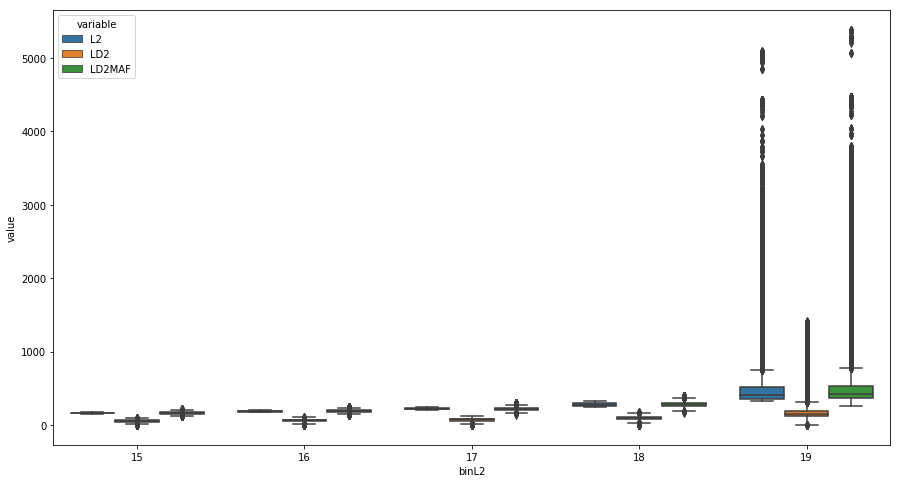

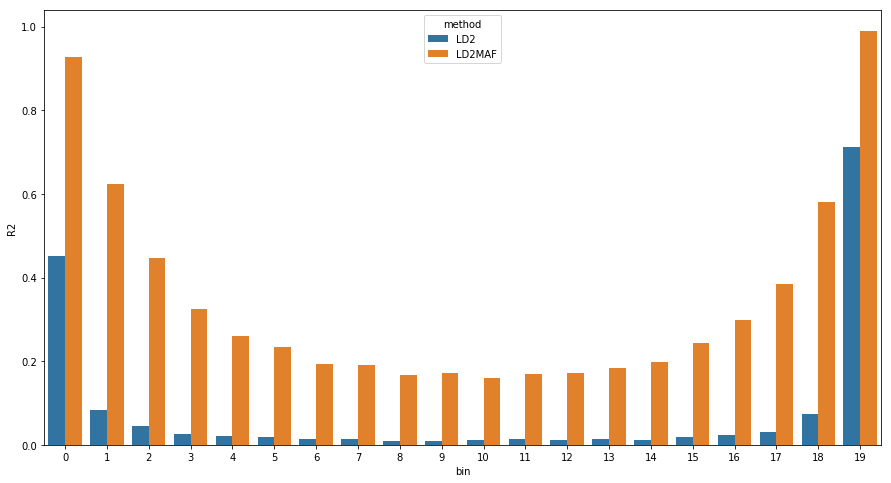

In [6]:
import seaborn as sns
from scipy import stats

def plot_binned_comparison(df, base_lds, other_lds, nbins=100, plot_range=None):
    
    
    # labels=np.quantile(df[base_lds], np.linspace(0.0, 1., nbins))
    df['bin' + base_lds] = pd.qcut(df[base_lds], nbins, labels=range(1, nbins + 1)).cat.codes
    
    r2_df = []
    
    for cc in df['bin' + base_lds].unique():
        regdf = df.loc[df['bin' + base_lds] == cc]
        for sc in other_lds:
            if sc == base_lds:
                continue
            slope, intercept, r_value, p_value, std_err = stats.linregress(regdf[base_lds],
                                                                           regdf[sc])
            #print(f"bin {cc}: {base_lds}-{sc}: R^2 = {r_value**2}")
            r2_df.append({'bin': cc, 'method': sc, 'R2': r_value**2})
            
    r2_df = pd.DataFrame(r2_df)
    
    if plot_range is not None:
        df = df.loc[(df['bin' + base_lds] >= plot_range[0]) & (df['bin' + base_lds] <= plot_range[1])]
    
    melt_df = pd.melt(df, 'bin' + base_lds, value_vars=other_lds)

    f, ax = plt.subplots(figsize=(15, 8))
    
    sns.boxplot(x='bin' + base_lds, y="value", hue="variable",
                data=melt_df)
    
    plt.show()
    
    f, ax = plt.subplots(figsize=(15, 8))
    
    sns.barplot(x='bin', y='R2', hue='method', data=r2_df)
    plt.show()
    

plot_binned_comparison(all_snps_ld_df, "L2", ["L2", "LD2", "LD2MAF"], nbins=20, plot_range=(15, 20))

(-30, 100)

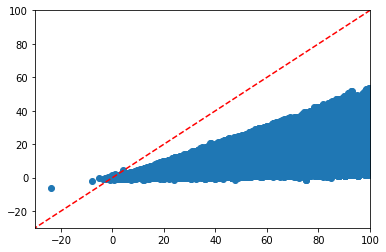

In [7]:
plt.scatter(all_snps_ld_df['L2'], all_snps_ld_df['LD2'])
x = np.linspace(-100, 100, 1000)
plt.plot(x, x, ls='--', c='red')
plt.xlim(-30, 100)
plt.ylim(-30, 100)

In [352]:
all_snps_ld_df.loc[all_snps_ld_df['LD2MAF'] < -30].groupby('CHR').size()

CHR
3      1
5      3
6      1
8      4
10     2
11    13
12     2
16     2
19     1
dtype: int64

In [369]:
all_snps_ld_df.loc[all_snps_ld_df['LD2MAF'] < -85]

,CHR,CM,BP,MAF,L2,SNP,LD2,LD2MAF,binL2,binLD2MAF,binLD2
394418,11,65.909316,45677517,0.011247,-23.769482,rs12802857,-19.071461,-85.092673,0,0,0


In [363]:
from numba import njit, prange

def read_plink_files(input_fname, chr_num):

    # Read/transform genotype matrices:
    try:
        gt_ac = read_plink1_bin(input_fname % chr_num + ".bed")
    except Exception as e:
        raise e

    gt_ac = np.abs(gt_ac.values - 2).astype(np.int64)
    ngt_ac = (gt_ac - gt_ac.mean(axis=0)) / gt_ac.std(axis=0)

    # Read the .bim file:
    try:
        gt_meta = pd.read_csv(input_fname % chr_num + ".bim",
                              names=['CHR', 'SNP', 'CM', 'BP', 'A1', 'A2'], sep='\t')
    except Exception as e:
        raise e

    maf = gt_ac.sum(axis=0) / (2. * gt_ac.shape[0])
    maf = np.round(np.where(maf > .5, 1. - maf, maf), float_precision)
    gt_meta['MAF'] = maf

    gt_meta = gt_meta[['CHR', 'SNP', 'CM', 'BP', 'MAF']]

    if weights:
        sel_snp_idx = np.where(gt_meta['SNP'].isin(snp_list))[0]

        fgt_meta = gt_meta.iloc[sel_snp_idx, ].reset_index(drop=True)
        fgt_ac = gt_ac[:, sel_snp_idx]
        fngt_ac = ngt_ac[:, sel_snp_idx]

        return fgt_ac, fngt_ac, fgt_meta
    else:
        return gt_ac, ngt_ac, gt_meta


# --------------- Auxiliary Functions ---------------


@njit(parallel=True)
def numba_count(a, out, m, n):
    for i in prange(m):
        for j in prange(n):
            out[a[i, j], i] += 1


@njit(parallel=True)
def bincount2D_numba(a, bin_num=9):

    m, n = a.shape
    out = np.zeros((bin_num, m), dtype=np.int_)

    numba_count(a, out, m, n)

    return out


@njit
def numba_corr(j, neighb):
    return np.dot(ngt_ac[:, j], ngt_ac[:, neighb]) / N


@njit
def d_squared_unphased(counts, n):
    """
    Implementation by Aaron Ragsdale
    """

    n1 = counts[0, :]
    n2 = counts[1, :]
    n3 = counts[2, :]
    n4 = counts[3, :]
    n5 = counts[4, :]
    n6 = counts[5, :]
    n7 = counts[6, :]
    n8 = counts[7, :]
    n9 = counts[8, :]

    numer = ((n2 * n4 - n2 ** 2 * n4 + 4 * n3 * n4 - 4 * n2 * n3 * n4 - 4 * n3 ** 2 * n4 - n2 * n4 ** 2 -
              4 * n3 * n4 ** 2 + n1 * n5 - n1 ** 2 * n5 + n3 * n5 + 2 * n1 * n3 * n5 - n3 ** 2 * n5 -
              4 * n3 * n4 * n5 - n1 * n5 ** 2 - n3 * n5 ** 2 + 4 * n1 * n6 - 4 * n1 ** 2 * n6 + n2 * n6 -
              4 * n1 * n2 * n6 - n2 ** 2 * n6 + 2 * n2 * n4 * n6 - 4 * n1 * n5 * n6 - 4 * n1 * n6 ** 2 - n2 * n6 ** 2 +
              4 * n2 * n7 - 4 * n2 ** 2 * n7 + 16 * n3 * n7 - 16 * n2 * n3 * n7 - 16 * n3 ** 2 * n7 -
              4 * n2 * n4 * n7 - 16 * n3 * n4 * n7 + n5 * n7 + 2 * n1 * n5 * n7 -
              4 * n2 * n5 * n7 - 18 * n3 * n5 * n7 - n5 ** 2 * n7 + 4 * n6 * n7 + 8 * n1 * n6 * n7 - 16 * n3 * n6 * n7 -
              4 * n5 * n6 * n7 - 4 * n6 ** 2 * n7 - 4 * n2 * n7 ** 2 - 16 * n3 * n7 ** 2 - n5 * n7 ** 2 -
              4 * n6 * n7 ** 2 + 4 * n1 * n8 - 4 * n1 ** 2 * n8 + 4 * n3 * n8 + 8 * n1 * n3 * n8 -
              4 * n3 ** 2 * n8 + n4 * n8 - 4 * n1 * n4 * n8 + 2 * n2 * n4 * n8 - n4 ** 2 * n8 -
              4 * n1 * n5 * n8 - 4 * n3 * n5 * n8 + n6 * n8 + 2 * n2 * n6 * n8 - 4 * n3 * n6 * n8 +
              2 * n4 * n6 * n8 - n6 ** 2 * n8 - 16 * n3 * n7 * n8 - 4 * n6 * n7 * n8 - 4 * n1 * n8 ** 2 -
              4 * n3 * n8 ** 2 - n4 * n8 ** 2 - n6 * n8 ** 2 + 16 * n1 * n9 - 16 * n1 ** 2 * n9 +
              4 * n2 * n9 - 16 * n1 * n2 * n9 - 4 * n2 ** 2 * n9 + 4 * n4 * n9 - 16 * n1 * n4 * n9 + 8 * n3 * n4 * n9 -
              4 * n4 ** 2 * n9 + n5 * n9 - 18 * n1 * n5 * n9 - 4 * n2 * n5 * n9 + 2 * n3 * n5 * n9 -
              4 * n4 * n5 * n9 - n5 ** 2 * n9 - 16 * n1 * n6 * n9 -
              4 * n2 * n6 * n9 + 8 * n2 * n7 * n9 + 2 * n5 * n7 * n9 - 16 * n1 * n8 * n9 - 4 * n4 * n8 * n9 -
              16 * n1 * n9 ** 2 - 4 * n2 * n9 ** 2 -
              4 * n4 * n9 ** 2 - n5 * n9 ** 2) / 16. +
             (-((n2 / 2. + n3 + n5 / 4. + n6 / 2.) * (n4 / 2. + n5 / 4. + n7 + n8 / 2.)) +
             (n1 + n2 / 2. + n4 / 2. + n5 / 4.) * (n5 / 4. + n6 / 2. + n8 / 2. + n9)) ** 2)

    return 4. * numer / (n * (n - 1) * (n - 2) * (n - 3))


# --------------------------------------------------
# --------------- LD Score Functions ---------------
# --------------------------------------------------

def compute_modified_ld_score(j, max_cm_dist=1.):

    # Obtain neighboring SNPs information:
    # --------------------------------------------
    # Condition to exclude focal snp: (gt_meta.index != gt_meta.iloc[j, ].name) &
    neighb_snps = gt_meta.loc[(np.abs(gt_meta['CM'] - gt_meta.iloc[j, ]['CM']) <= max_cm_dist), ]

    neighb_snps_annot = neighb_snps.iloc[:, annot_start_idx:].values
    neighb_snps_idx = neighb_snps.index.values
    var_xk = neighb_snps['VAR'].values
    var_xj = gt_meta.iloc[j, ]['VAR']

    # --------------------------------------------
    # Compute D^2
    gt_counts = gt_ac[:, j, np.newaxis] * 3 + gt_ac[:, neighb_snps_idx]
    count_mat = bincount2D_numba(gt_counts.T)

    # D^2 vector with all neighboring SNPs:
    D2 = d_squared_unphased(count_mat[::-1, :], N)
    d2_copy = D2.copy()

    # --------------------------------------------
    # Compute r^2
    lj = numba_corr(j, neighb_snps_idx)**2
    lj -= (1. - lj)/(N - 2)

    # --------------------------------------------
    # Compute scores based on different estimators/assumptions:
    @njit
    def matdot(annot_mat, cov_vec):
        return np.dot(annot_mat.T, cov_vec)

    # = = = = = = D^2 based estimators = = = = = =

    D2 = (4. / var_xj) * D2 - var_xk / N

    # Lj D^2 estimator
    Lj = matdot(neighb_snps_annot, D2)

    # Lj D^2 MAF-dependent estimator
    Lj_maf = matdot(neighb_snps_annot / var_xk.reshape(-1, 1), D2)

    # = = = = = = r^2 based estimators = = = = = =
    # Estimator based on r^2 with correction (Bulik-Sullivan et al.)
    lj = matdot(neighb_snps_annot, lj)

    return j, (Lj, Lj_maf, lj), D2, neighb_snps, d2_copy

In [338]:
import os
from pandas_plink import read_plink1_bin


dist_measure = "cM"
annot_start_idx = 6
weights = True
scores_to_compute = ["LD2", "LD2MAF", "L2"]
population = "EUR"

# = = = = = = = = = =
# Computational configurations:
num_proc = 4
float_precision = 15
os.environ["OMP_NUM_THREADS"] = "2"
os.environ["NUMBA_NUM_THREADS"] = "2"
chr_num = 11

# = = = = = = = = = =
# Input:
plink_dir = "../data/genotype_files/1000G_Phase3_" + population + "_plinkfiles/1000G." + population + ".QC.%s"
w_snp_filter = "../data/genotype_files/w_snplist_no_MHC.snplist.bz2"
annotations = "../data/ld_scores/1000G_Phase3_" + population + "_baselineLD_v2.2_ldscores/baselineLD.%d.annot.gz"


try:
    snp_list = pd.read_csv(w_snp_filter, sep="\t")['SNP'].values
except Exception as e:
    raise e


try:
    gt_ac, ngt_ac, gt_meta = read_plink_files(plink_dir, str(chr_num))
except Exception as e:
    print(e)

N, M = gt_ac.shape

gt_meta['VAR'] = 2.*gt_meta['MAF']*(1. - gt_meta['MAF'])
mu = np.mean(gt_meta['VAR'])
print("Mean frequency variance:", mu)

Mapping files: 100%|██████████| 3/3 [00:25<00:00,  8.41s/it]


Mean frequency variance: 0.32429374985148396


In [334]:
gt_meta.head()

,CHR,SNP,CM,BP,MAF,VAR
0,11,rs3741411,0.003268,199256,0.193182,0.311725
1,11,rs11602954,0.019605,202856,0.022727,0.044421
2,11,rs2280543,0.020673,203788,0.068182,0.127066
3,11,rs2280544,0.020973,204062,0.440909,0.493017
4,11,rs1045454,0.021133,204228,0.067045,0.125101


In [340]:
gt_meta.loc[(np.abs(gt_meta['CM'] - gt_meta.iloc[22610, ]['CM']) <= 1.), ]

,CHR,SNP,CM,BP,MAF,VAR
22208,11,rs4755295,64.914378,44928429,0.062372,0.116964
22209,11,rs10838385,64.915064,44928520,0.016360,0.032185
22210,11,rs1867790,64.920119,44929199,0.309816,0.427660
22211,11,rs7924523,64.923588,44929838,0.410020,0.483807
22212,11,rs4755296,64.927523,44930635,0.489775,0.499791
...,...,...,...,...,...,...
24349,11,rs7123108,66.905877,56185401,0.095092,0.172099
24350,11,rs7931261,66.905998,56185689,0.267894,0.392253
24351,11,rs1945205,66.907572,56186430,0.388548,0.475157
24352,11,rs10501353,66.907978,56190148,0.266871,0.391302


In [339]:
gt_meta.loc[gt_meta['SNP'] == 'rs12802857',]

,CHR,SNP,CM,BP,MAF,VAR
22610,11,rs12802857,65.909316,45677517,0.011247,0.022242


In [364]:
res = compute_modified_ld_score(22610)

In [365]:
df = res[-2]
df['D2'] = res[-1]
df['mD2'] = res[-3]
df

/Users/szabad/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/szabad/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CHR,SNP,CM,BP,MAF,VAR,D2,mD2
22208,11,rs4755295,64.914378,44928429,0.062372,0.116964,-8.119703e-07,-0.000385
22209,11,rs10838385,64.915064,44928520,0.016360,0.032185,1.168557e-07,-0.000045
22210,11,rs1867790,64.920119,44929199,0.309816,0.427660,-1.700038e-06,-0.001180
22211,11,rs7924523,64.923588,44929838,0.410020,0.483807,-3.329574e-06,-0.001588
22212,11,rs4755296,64.927523,44930635,0.489775,0.499791,3.055707e-06,-0.000473
...,...,...,...,...,...,...,...,...
24349,11,rs7123108,66.905877,56185401,0.095092,0.172099,-3.468296e-06,-0.000976
24350,11,rs7931261,66.905998,56185689,0.267894,0.392253,-2.069887e-06,-0.001174
24351,11,rs1945205,66.907572,56186430,0.388548,0.475157,-4.412862e-06,-0.001765
24352,11,rs10501353,66.907978,56190148,0.266871,0.391302,-1.978438e-06,-0.001156


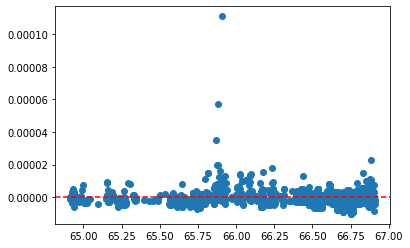

In [368]:
plt.scatter(df['CM'], df['D2'])
plt.axhline(0, ls='--', c='r')

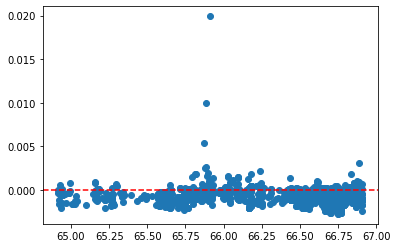

In [370]:
plt.scatter(df['CM'], df['mD2'])
plt.axhline(0, ls='--', c='r')

In [2]:
import os, sys; sys.path.append("../")

from gamma_glm_model import fit_ldscore_data
from utils import read_pbz2

In [22]:
lds_data = read_pbz2("../cache/regression/UKBB_data/M_5_50_chi2filt/BMI/S-LD2MAF.pbz2") 


KeyboardInterrupt



In [4]:
reg_res = read_pbz2("../results/regression/UKBB_data/M_5_50_chi2filt/BMI/regression_res.pbz2")

In [ ]:
fit_ldscore_data(*lds_data[:-1], link='identity')

In [ ]:
approx_gamma_loglik()

In [20]:
reg_res['LD2MAF']

{'method': 'LD2MAF',
 'N': array([457824]),
 'M': 5961159,
 'counts': array([[5961159.]]),
 'MC': 5961159.0,
 'hg2': 0.25055189973891917,
 'hg2_se': 0.007268915660941831,
 'Mean Chi2': 2.997108238881066,
 'Intercept': 1.1681385777018445,
 'Intercept_se': 0.01843558476198765,
 'Ratio': 0.08419101900858242,
 'Ratio_se': 0.009231139506146827,
 'Coefficients': [('baseLD2MAF', 4.203073592550026e-08)]}

In [9]:
reg_res['L2']['Coefficients'][0][1]

0.019129000875428348

In [16]:
np.exp(5961159*0.00712274/457824)

1.0971792791067025

In [25]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
r_value**2

0.7524635490793768